# Hypothesis Testing Exercise on Customer+OrderForm Data

**Problem Statement -** TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.

#### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Dataset

In [2]:
df = pd.read_csv('Costomer+OrderForm.csv')
df

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


#### EDA on dataset

In [3]:
# Check for data types, non-null values & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [4]:
# Get central tendency, dispersion and shape of dataset’s distribution
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [5]:
# Check the dimensions of the DataFrame
df.shape

(300, 4)

In [6]:
df_count = df.apply(pd.Series.value_counts)
df_count

,Phillippines,Indonesia,Malta,India
Error Free,271,267,269,280
Defective,29,33,31,20


#### Visualize data

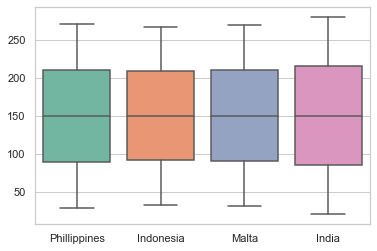

In [7]:
sns.set(style="whitegrid")
ax = sns.boxplot(data = df_count, orient = "v", palette = "Set2")

In [8]:
from scipy import stats

Consider significance level i.e. $\alpha$ as 5%. <br>
**Null hypothesis (H0)** - There is no statistical significance between the two variables. <br>
**Alternate Hypothesis (H1)** - There is a statistically significant relationship between two variables.

In [9]:
stats.chi2_contingency([df_count["Phillippines"], df_count["Indonesia"], df_count["Malta"], df_count["India"]])

(3.8589606858203545,
 0.2771020991233144,
 3,
 array([[271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25]]))

P value of Chi-Square test is 0.277 which is greater than 0.05 i.e. $\alpha$.

Hence, H0 is accepted.